In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('transformed_df.xlsx')

In [3]:
dft = df.copy()

In [4]:
replace_map = {'loan_status': {'Current': 0, 'Fully Paid': 0, 'Charged Off': 1, 'Late (31-120 days)': 1,
                                  'In Grace Period': 1, 'Late (16-30 days)': 1, 'Default': 1}}
df.replace(replace_map, inplace=True)

In [5]:
dft.replace(replace_map, inplace=True)

In [6]:
dft['loan_status'].value_counts()

0    141492
1      9300
Name: loan_status, dtype: int64

In [7]:
def analyze_bivariate_cat_cat(x):
    print("Statistical test used: Chi_2 contingency")
    table = pd.crosstab(df[x],df['loan_status'])
    observed_value= table.values
    hypo_test =chi2_contingency(observed=observed_value)
    print("pvalue:", hypo_test[1])
    if hypo_test[1]>0.05:
        print("The attribute:",x,"is independent on loan_status")
    else:
        print("The attributes:",x,"is dependent on loan_status")
        
    print("")
    print("BIVARIATE PLOTS: loan_status Vs",x)
    pd.crosstab(df[x],df['loan_status']).plot(kind='bar')
    plt.show()
    #dff = df.loc[:,['loan_status',x]]
    #dff = pd.get_dummies(dff, drop_first=True)
    #sns.heatmap(dff.corr(), annot=True)
    #plt.show()
    

In [8]:
def analyze_bivariate_num_cat(x,y):
    print("Before Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_dist)
    plt.axvline(x.mean(), color='r')
    plt.axvline(x.median(),color='g')
    plt.show()
    print("Before Transformation Skewness:",x.skew())
    print("")
    print("Checking for skewness with different transformation techniques")
    print('sqrt:',np.sqrt(x).skew())
    print('cube root:',np.cbrt(x).skew())
    #try:
    #    print('log:',np.log(x).skew())
    #except ZeroDivisionError:
    #      print("The log transformation raised an error")
        
    
    fitted_data2, fitted_lambda2 = stats.yeojohnson(x)
    fitted_data2 = pd.Series(fitted_data2)
    print('yeo-jhonson:',pd.Series(fitted_data2).skew())
    #try:
    #    fitted_data1, fitted_lambda1 = stats.boxcox(x)
    #    print('boxcox:',fitted_data1.skew())
    #except:
    #    raise ValueError('The boxcox tranformation raised an errro')

    print("")
    print("After Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(fitted_data2,ax=ax_box)
    sns.distplot(fitted_data2,ax=ax_dist)
    plt.axvline(fitted_data2.mean(), color='r')
    plt.axvline(fitted_data2.median(),color='g')
    plt.show()
    print("After Transformation Skewness:",fitted_data2.skew())
    print("The lambda value is",fitted_lambda2)
    
    #dft[y] = 
    dft[y] = pd.Series(fitted_data2)
    print("Bivariate Analysis")
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    sns.boxplot(x='loan_status',y=fitted_data2,data=dft,whis=2.5)
    plt.title('with transformation')
    plt.subplot(2,2,2)
    sns.boxplot(x='loan_status',y=x,data=df)
    plt.title('without transformation')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,3)
    sns.violinplot(x='loan_status',y=fitted_data2,data=dft)
    plt.title('with transformation')
    plt.subplot(2,2,4)
    sns.violinplot(x='loan_status',y=x,data=df)
    plt.title('without transformation')
    plt.show()
    
    print("")
    print("Correlation:")
    print('with transformation:')
    print(dft[['loan_status',y]].corr())
    print('without transformation:')
    print(df[['loan_status',y]].corr())
    
    print("")
    print("Statiscal Test:")
    print("Without Transformation")
    a = df[df['loan_status']==0][y]
    b = df[df['loan_status']==1][y]
    print(stats.kruskal(a,b))
    print(stats.mannwhitneyu(a,b,alternative='two-sided'))
    
    #dft[y] = stats.yeojohnson(x)    
    print("With Transformation")
    #df.reset_index(inplace=True)
    #df1.reset_index(inplace=True)
    #print(len(df1[y]))
    #dft[y]=stats.yeojohnson(x)
    c = dft[dft['loan_status']==0][y]
    d = dft[dft['loan_status']==1][y]
    
    print(stats.kruskal(c,d))
    print(stats.mannwhitneyu(c,d,alternative='two-sided'))
    
    #print(stats.f_oneway(c,d))
    #print(stats.ttest_ind(c,d,alternative='two-sided'))

In [9]:
def analyze_bivariate_num_null(y):
    print("Before null value imputation- null values :",dft[y].isnull().sum())
    dft[y].fillna(0,inplace=True)
    print("After null value imputation-null values :",dft[y].isnull().sum())
    

In [10]:
def analyze_bivariate_num_null_median(y):
    print("Before null value imputation- null values :",dft[y].isnull().sum())
    dft[y].fillna(dft[y].median(),inplace=True)
    print("After null value imputation-null values :",dft[y].isnull().sum())
    

In [11]:
def analyze_bivariate_num_null_mean(y):
    print("Before null value imputation- null values :",dft[y].isnull().sum())
    dft[y].fillna(dft[y].mean(),inplace=True)
    print("After null value imputation-null values :",dft[y].isnull().sum())
    

In [12]:
#from sklearn.impute import KNNImputer
##def analyze_bivariate_num_null_median(y):
    #print("Before null value imputation- null values :",dft[y].isnull().sum())
    #knn=KNNImputer(n_neighbors=5)
    #dft[y]=knn.fit_transform(dft[y])
    #print("After null value imputation-null values :",dft[y].isnull().sum())
    

### Column/Attribute_ 1 :  mths_since_recent_revol_delinq


In [13]:
analyze_bivariate_num_null('mths_since_recent_revol_delinq')

Before null value imputation- null values : 107531
After null value imputation-null values : 0


Before Transformation


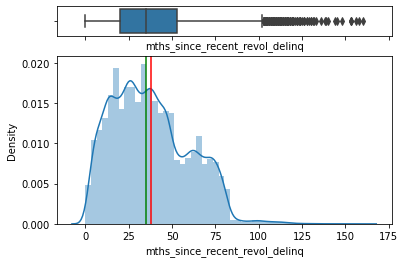

Before Transformation Skewness: 0.5365354575636386

Checking for skewness with different transformation techniques
sqrt: -0.13756970228220589
cube root: -0.4103774268164899
yeo-jhonson: 56.10849884664077

After Transformation


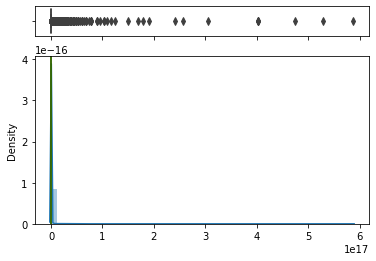

After Transformation Skewness: 56.10849884664077
The lambda value is 8.472135811722177
Bivariate Analysis


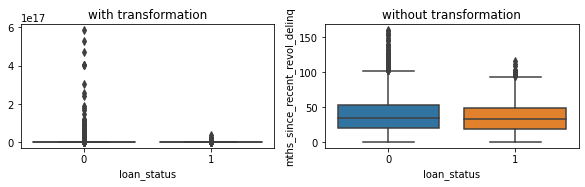

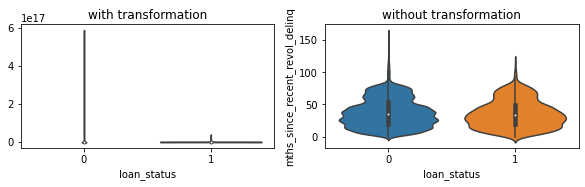


Correlation:
with transformation:
                                loan_status  mths_since_recent_revol_delinq
loan_status                         1.00000                        -0.00878
mths_since_recent_revol_delinq     -0.00878                         1.00000
without transformation:
                                loan_status  mths_since_recent_revol_delinq
loan_status                        1.000000                       -0.021924
mths_since_recent_revol_delinq    -0.021924                        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=887272306.0, pvalue=0.0)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=887272306.0, pvalue=0.0)


In [14]:
analyze_bivariate_num_cat(df['mths_since_recent_revol_delinq'],'mths_since_recent_revol_delinq')

### Column/Attribute_ 2 :  mths_since_last_delinq



In [15]:
analyze_bivariate_num_null_mean('mths_since_last_delinq')

Before null value imputation- null values : 84604
After null value imputation-null values : 0


Before Transformation


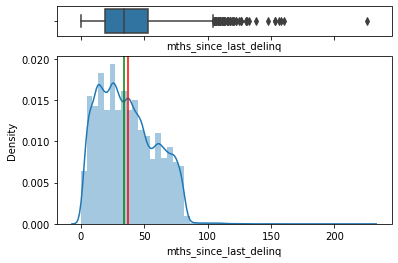

Before Transformation Skewness: 0.4037968835281117

Checking for skewness with different transformation techniques
sqrt: -0.1783496665256332
cube root: -0.42121606079194274
yeo-jhonson: 252.65908332210427

After Transformation


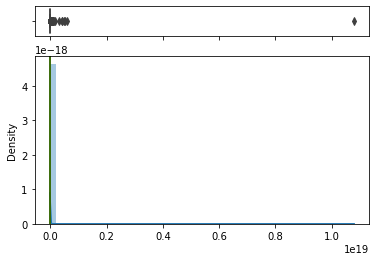

After Transformation Skewness: 252.65908332210427
The lambda value is 8.472135811722177
Bivariate Analysis


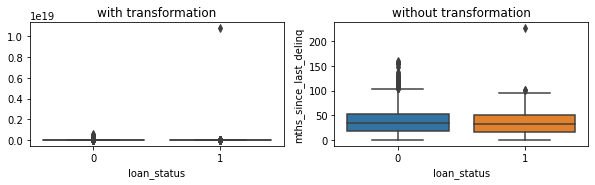

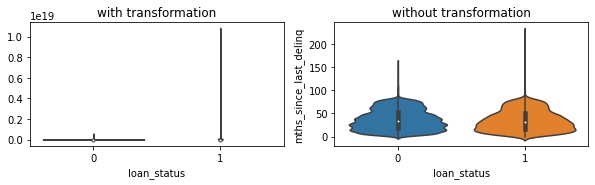


Correlation:
with transformation:
                        loan_status  mths_since_last_delinq
loan_status                1.000000                0.014001
mths_since_last_delinq     0.014001                1.000000
without transformation:
                        loan_status  mths_since_last_delinq
loan_status                1.000000               -0.022462
mths_since_last_delinq    -0.022462                1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=772364476.5, pvalue=3.1804883982179034e-174)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=772364476.5, pvalue=3.1804883982179034e-174)


In [16]:
analyze_bivariate_num_cat(df['mths_since_last_delinq'],'mths_since_last_delinq')

### Column/Attribute_ 3 :  il_util



In [17]:
analyze_bivariate_num_null_mean('il_util')

Before null value imputation- null values : 25056
After null value imputation-null values : 0


Before Transformation


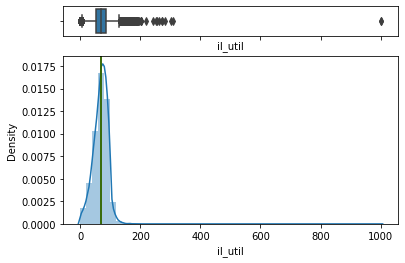

Before Transformation Skewness: 0.6750495193944546

Checking for skewness with different transformation techniques
sqrt: -1.2328229028948856
cube root: -2.0747838858754286
yeo-jhonson: 250.73192747145941

After Transformation


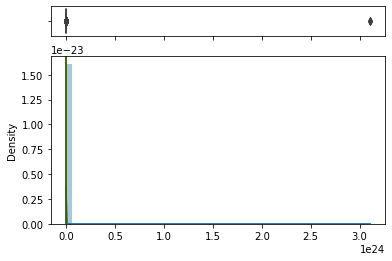

After Transformation Skewness: 250.73192747145941
The lambda value is 8.472135811722177
Bivariate Analysis


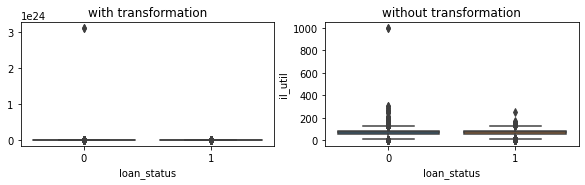

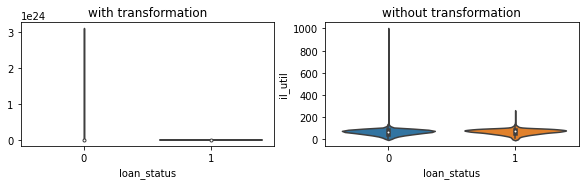


Correlation:
with transformation:
             loan_status   il_util
loan_status     1.000000 -0.001009
il_util        -0.001009  1.000000
without transformation:
             loan_status   il_util
loan_status     1.000000  0.035479
il_util         0.035479  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=610118248.0, pvalue=6.245469589410212e-32)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=610118248.0, pvalue=6.245469589410212e-32)


In [18]:
analyze_bivariate_num_cat(df['il_util'],'il_util')

### Column/Attribute_4  :  mths_since_recent_inq

In [19]:
###

In [20]:
analyze_bivariate_num_null_median('il_util')

Before null value imputation- null values : 25056
After null value imputation-null values : 0


Before Transformation


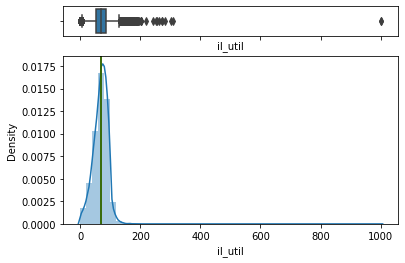

Before Transformation Skewness: 0.6750495193944546

Checking for skewness with different transformation techniques
sqrt: -1.2328229028948856
cube root: -2.0747838858754286
yeo-jhonson: 250.73192747145941

After Transformation


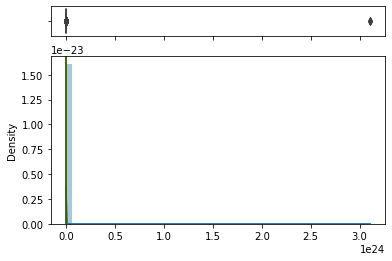

After Transformation Skewness: 250.73192747145941
The lambda value is 8.472135811722177
Bivariate Analysis


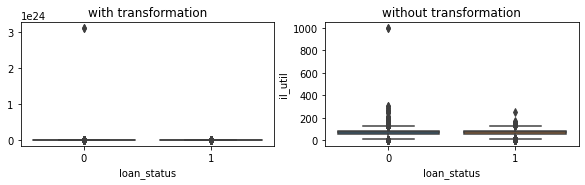

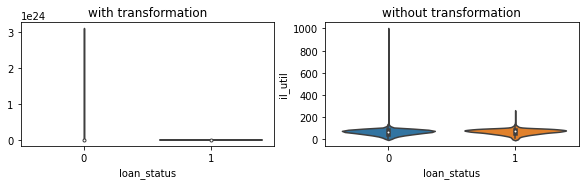


Correlation:
with transformation:
             loan_status   il_util
loan_status     1.000000 -0.001009
il_util        -0.001009  1.000000
without transformation:
             loan_status   il_util
loan_status     1.000000  0.035479
il_util         0.035479  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=610118248.0, pvalue=6.245469589410212e-32)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=610118248.0, pvalue=6.245469589410212e-32)


In [21]:
analyze_bivariate_num_cat(df['il_util'],'il_util')

### Column/Attribute_5  :  mths_since_rcnt_il

In [22]:
####

In [23]:
analyze_bivariate_num_null_median('mths_since_rcnt_il')

Before null value imputation- null values : 5886
After null value imputation-null values : 0


Before Transformation


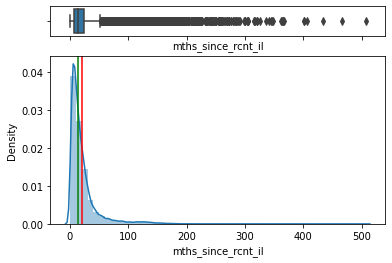

Before Transformation Skewness: 3.5288190332829648

Checking for skewness with different transformation techniques
sqrt: 1.574278000338982
cube root: 0.9984713793710531
yeo-jhonson: 261.5932405847965

After Transformation


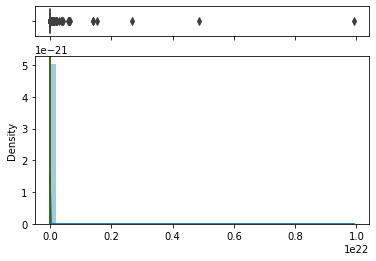

After Transformation Skewness: 261.5932405847965
The lambda value is 8.472135811722177
Bivariate Analysis


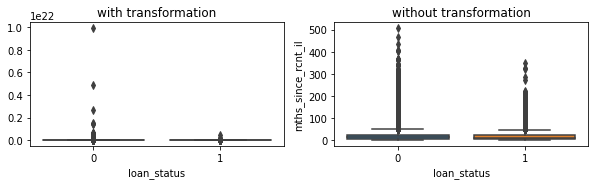

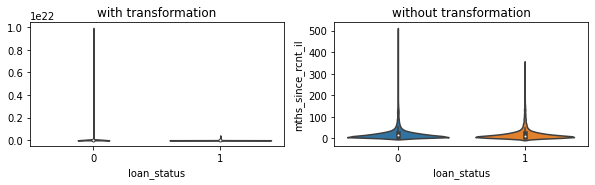


Correlation:
with transformation:
                    loan_status  mths_since_rcnt_il
loan_status            1.000000           -0.000826
mths_since_rcnt_il    -0.000826            1.000000
without transformation:
                    loan_status  mths_since_rcnt_il
loan_status            1.000000           -0.011522
mths_since_rcnt_il    -0.011522            1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=696455075.5, pvalue=2.637403746053803e-21)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=696455075.5, pvalue=2.637403746053803e-21)


In [24]:
analyze_bivariate_num_cat(df['mths_since_rcnt_il'],'mths_since_rcnt_il')

### Column/Attribute_ 6 : mo_sin_old_il_acct

In [25]:
####

In [26]:
analyze_bivariate_num_null_median('mo_sin_old_il_acct')

Before null value imputation- null values : 5886
After null value imputation-null values : 0


Before Transformation


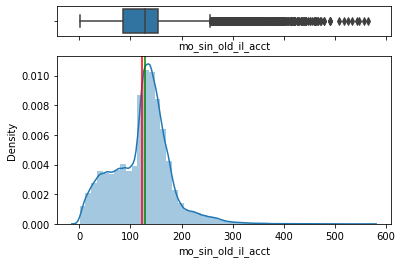

Before Transformation Skewness: 0.30752551004163403

Checking for skewness with different transformation techniques
sqrt: -0.6588129540895679
cube root: -0.9976615912820457
yeo-jhonson: 101.54473271492655

After Transformation


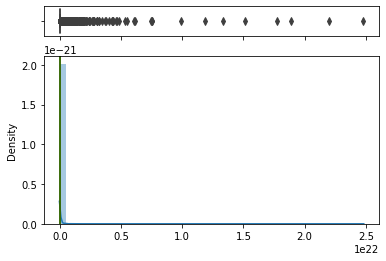

After Transformation Skewness: 101.54473271492655
The lambda value is 8.472135811722177
Bivariate Analysis


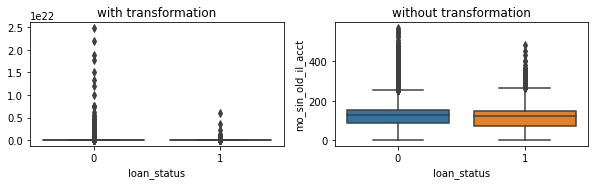

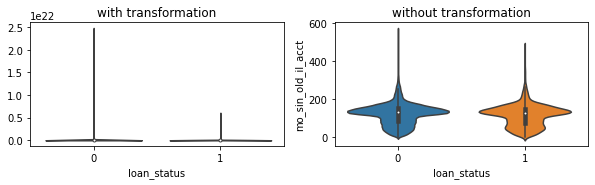


Correlation:
with transformation:
                    loan_status  mo_sin_old_il_acct
loan_status            1.000000           -0.002027
mo_sin_old_il_acct    -0.002027            1.000000
without transformation:
                    loan_status  mo_sin_old_il_acct
loan_status             1.00000            -0.03117
mo_sin_old_il_acct     -0.03117             1.00000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=690598163.5, pvalue=9.589750619731117e-16)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=690598163.5, pvalue=9.589750619731117e-16)


In [27]:
analyze_bivariate_num_cat(df['mo_sin_old_il_acct'],'mo_sin_old_il_acct')

### Column/Attribute_7  :  bc_util

In [28]:
analyze_bivariate_num_null_mean('bc_util')

Before null value imputation- null values : 2152
After null value imputation-null values : 0


Before Transformation


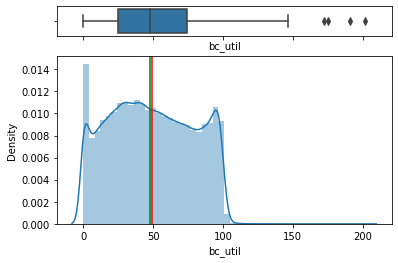

Before Transformation Skewness: 0.06315863225296721

Checking for skewness with different transformation techniques
sqrt: -0.6881316761760925
cube root: -1.2652857214174167
yeo-jhonson: 238.00577167787523

After Transformation


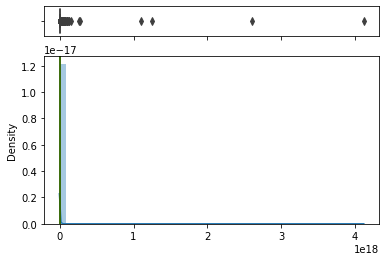

After Transformation Skewness: 238.00577167787523
The lambda value is 8.472135811722177
Bivariate Analysis


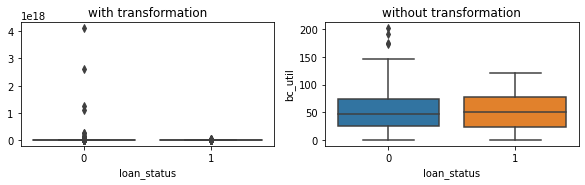

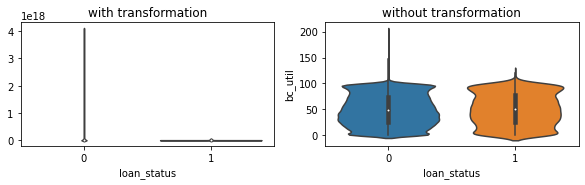


Correlation:
with transformation:
             loan_status   bc_util
loan_status     1.000000  0.002647
bc_util         0.002647  1.000000
without transformation:
             loan_status   bc_util
loan_status     1.000000  0.008997
bc_util         0.008997  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=640271110.0, pvalue=1.3952701490591768e-05)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=640271110.0, pvalue=1.3952701490591768e-05)


In [29]:
analyze_bivariate_num_cat(df['bc_util'],'bc_util')

### Column/Attribute_ 8 :  percent_bc_gt_75

In [30]:
####

In [31]:
analyze_bivariate_num_null_median('percent_bc_gt_75')

Before null value imputation- null values : 2092
After null value imputation-null values : 0


Before Transformation


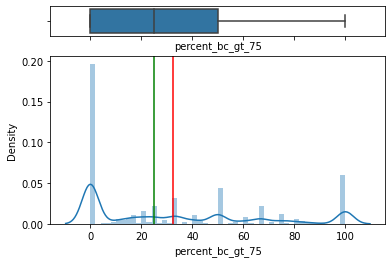

Before Transformation Skewness: 0.7374231517734474

Checking for skewness with different transformation techniques
sqrt: 0.08469625694143323
cube root: -0.1572452533237568
yeo-jhonson: 2.2716368932100828

After Transformation


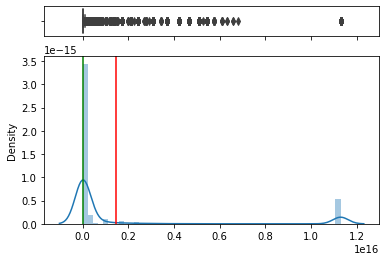

After Transformation Skewness: 2.2716368932100828
The lambda value is 8.472135811722177
Bivariate Analysis


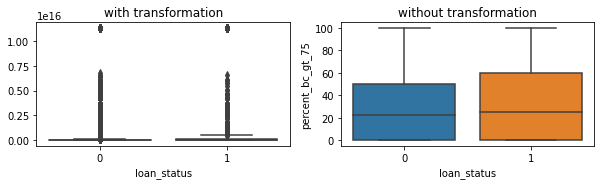

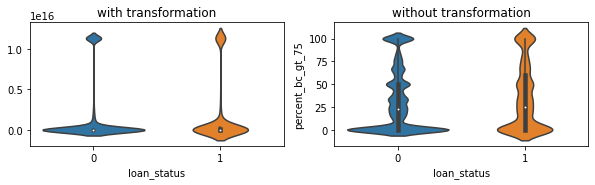


Correlation:
with transformation:
                  loan_status  percent_bc_gt_75
loan_status          1.000000          0.017383
percent_bc_gt_75     0.017383          1.000000
without transformation:
                  loan_status  percent_bc_gt_75
loan_status          1.000000          0.017742
percent_bc_gt_75     0.017742          1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=630940344.5, pvalue=7.301888611789359e-12)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=630940344.5, pvalue=7.301888611789359e-12)


In [32]:
analyze_bivariate_num_cat(df['percent_bc_gt_75'],'percent_bc_gt_75')

### Column/Attribute_ 9 :  bc_open_to_buy


In [33]:
###

In [34]:
analyze_bivariate_num_null_median('bc_open_to_buy')

Before null value imputation- null values : 2087
After null value imputation-null values : 0


Before Transformation


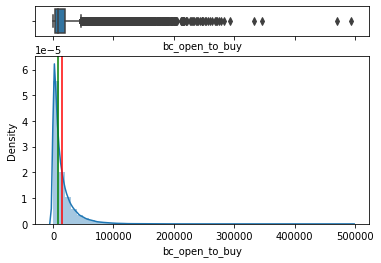

Before Transformation Skewness: 3.2147088021825656

Checking for skewness with different transformation techniques
sqrt: 1.0312963788493499
cube root: 0.4251732006313148
yeo-jhonson: 287.162632312726

After Transformation


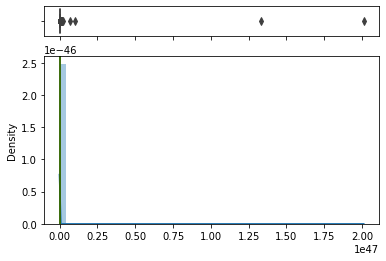

After Transformation Skewness: 287.162632312726
The lambda value is 8.472135811722177
Bivariate Analysis


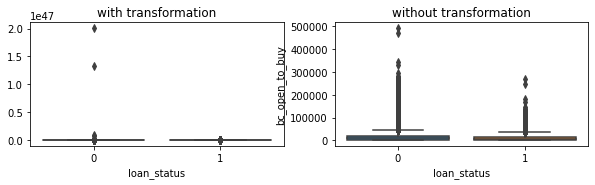

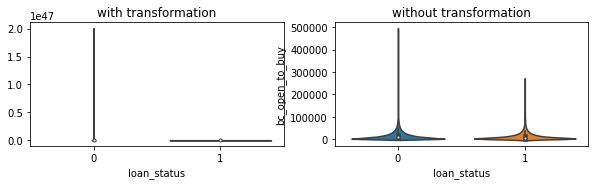


Correlation:
with transformation:
                loan_status  bc_open_to_buy
loan_status        1.000000       -0.000965
bc_open_to_buy    -0.000965        1.000000
without transformation:
                loan_status  bc_open_to_buy
loan_status        1.000000       -0.041889
bc_open_to_buy    -0.041889        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=728533579.0, pvalue=1.6324050671555968e-67)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=728533579.0, pvalue=1.6324050671555968e-67)


In [35]:
analyze_bivariate_num_cat(df['bc_open_to_buy'],'bc_open_to_buy')

### Column/Attribute_10  :  mths_since_recent_bc

In [36]:
###

In [37]:
analyze_bivariate_num_null_median('mths_since_recent_bc')

Before null value imputation- null values : 1961
After null value imputation-null values : 0


Before Transformation


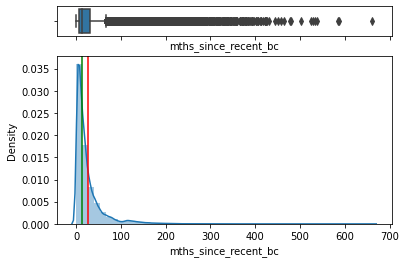

Before Transformation Skewness: 3.68514893752507

Checking for skewness with different transformation techniques
sqrt: 1.461258464233348
cube root: 0.8166124634564496
yeo-jhonson: 260.19485257597466

After Transformation


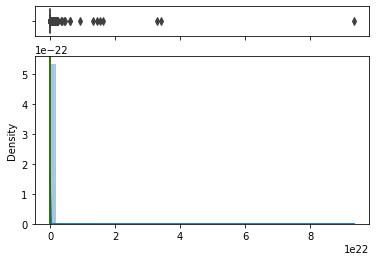

After Transformation Skewness: 260.19485257597466
The lambda value is 8.472135811722177
Bivariate Analysis


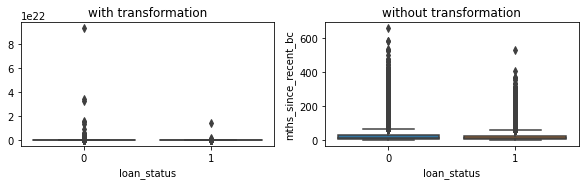

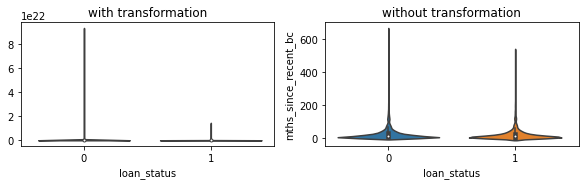


Correlation:
with transformation:
                      loan_status  mths_since_recent_bc
loan_status              1.000000             -0.000025
mths_since_recent_bc    -0.000025              1.000000
without transformation:
                      loan_status  mths_since_recent_bc
loan_status              1.000000             -0.014142
mths_since_recent_bc    -0.014142              1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=701658684.5, pvalue=5.56167403778232e-27)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=701658684.5, pvalue=5.56167403778232e-27)


In [38]:
analyze_bivariate_num_cat(df['mths_since_recent_bc'],'mths_since_recent_bc')

### Column/Attribute_11  :  dti

In [39]:
analyze_bivariate_num_null_median('bc_open_to_buy')

Before null value imputation- null values : 2087
After null value imputation-null values : 0


Before Transformation


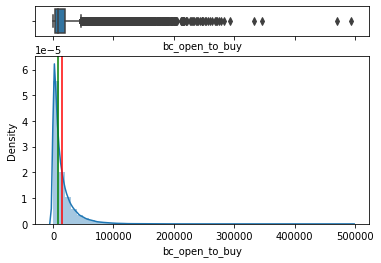

Before Transformation Skewness: 3.2147088021825656

Checking for skewness with different transformation techniques
sqrt: 1.0312963788493499
cube root: 0.4251732006313148
yeo-jhonson: 287.162632312726

After Transformation


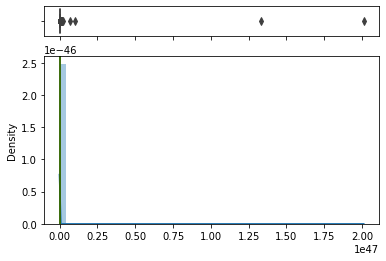

After Transformation Skewness: 287.162632312726
The lambda value is 8.472135811722177
Bivariate Analysis


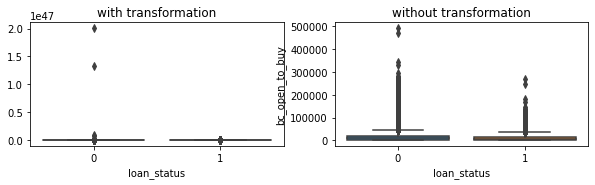

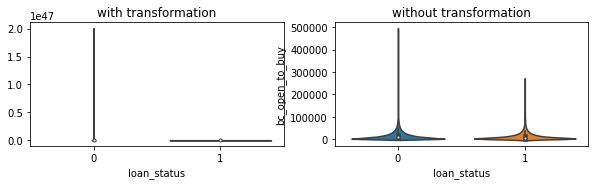


Correlation:
with transformation:
                loan_status  bc_open_to_buy
loan_status        1.000000       -0.000965
bc_open_to_buy    -0.000965        1.000000
without transformation:
                loan_status  bc_open_to_buy
loan_status        1.000000       -0.041889
bc_open_to_buy    -0.041889        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=728533579.0, pvalue=1.6324050671555968e-67)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=728533579.0, pvalue=1.6324050671555968e-67)


In [40]:
analyze_bivariate_num_cat(df['bc_open_to_buy'],'bc_open_to_buy')

### Column/Attribute_12  :  revol_util

In [41]:
analyze_bivariate_num_null_mean('revol_util')

Before null value imputation- null values : 204
After null value imputation-null values : 0


Before Transformation


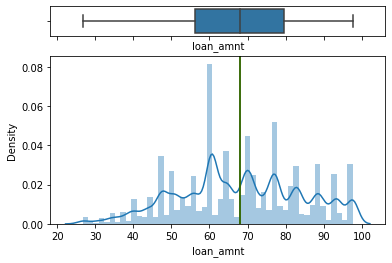

Before Transformation Skewness: -0.05087698868027481

Checking for skewness with different transformation techniques
sqrt: -0.32976440407829677
cube root: -0.43281256199374457
yeo-jhonson: -0.05236084962926698

After Transformation


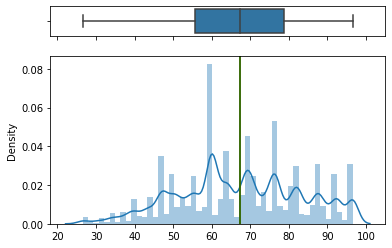

After Transformation Skewness: -0.05236084962926698
The lambda value is 0.9970875087528425
Bivariate Analysis


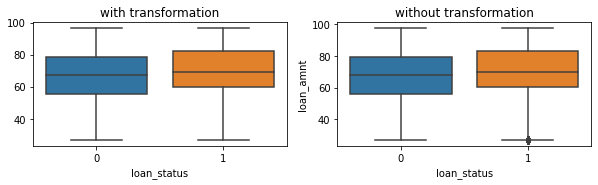

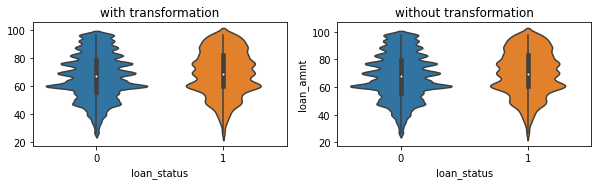


Correlation:
with transformation:
             loan_status  loan_amnt
loan_status      1.00000    0.03496
loan_amnt        0.03496    1.00000
without transformation:
             loan_status  loan_amnt
loan_status      1.00000    0.03496
loan_amnt        0.03496    1.00000

Statiscal Test:
Without Transformation
KruskalResult(statistic=186.92181713139365, pvalue=1.4936886574290454e-42)
MannwhitneyuResult(statistic=602407324.0, pvalue=1.4936911847018637e-42)
With Transformation
KruskalResult(statistic=186.92181713139365, pvalue=1.4936886574290454e-42)
MannwhitneyuResult(statistic=602407324.0, pvalue=1.4936911847018637e-42)


In [42]:
analyze_bivariate_num_cat(df['loan_amnt'],'loan_amnt')

### Column/Attribute_13  :  all_util

In [43]:
analyze_bivariate_num_null_mean('all_util')

Before null value imputation- null values : 40
After null value imputation-null values : 0


Before Transformation


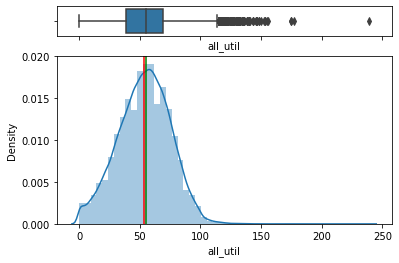

Before Transformation Skewness: -0.08059644006382956

Checking for skewness with different transformation techniques
sqrt: -0.9814475596319668
cube root: -1.6576663689768676
yeo-jhonson: 371.6263114434594

After Transformation


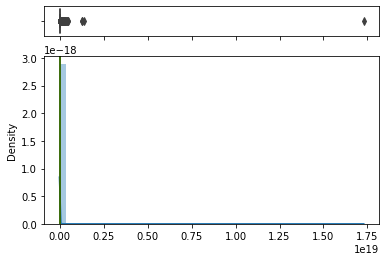

After Transformation Skewness: 371.6263114434594
The lambda value is 8.472135811722177
Bivariate Analysis


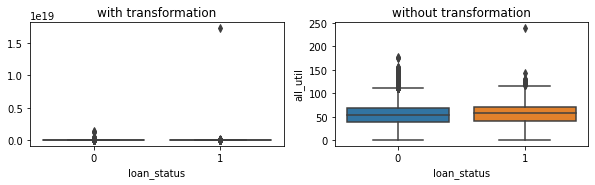

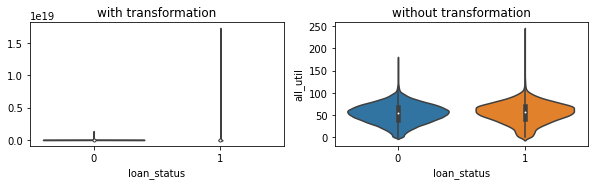


Correlation:
with transformation:
             loan_status  all_util
loan_status     1.000000  0.010407
all_util        0.010407  1.000000
without transformation:
             loan_status  all_util
loan_status     1.000000  0.020868
all_util        0.020868  1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=618705543.5, pvalue=4.967808336545371e-22)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=618705543.5, pvalue=4.967808336545371e-22)


In [44]:
analyze_bivariate_num_cat(df['all_util'],'all_util')

### Column/Attribute_14  :  avg_cur_bal

In [45]:
analyze_bivariate_num_null_median('avg_cur_bal')

Before null value imputation- null values : 11
After null value imputation-null values : 0


Before Transformation


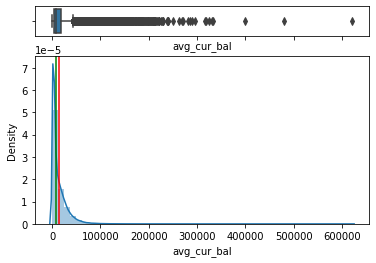

Before Transformation Skewness: 3.7404172006369945

Checking for skewness with different transformation techniques
sqrt: 1.11922292982956
cube root: 0.6157776211403613
yeo-jhonson: 381.2538767169356

After Transformation


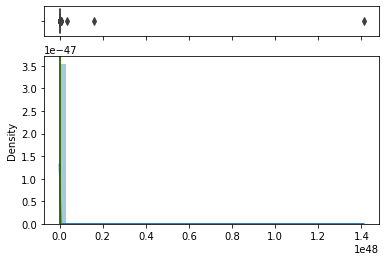

After Transformation Skewness: 381.2538767169356
The lambda value is 8.472135811722177
Bivariate Analysis


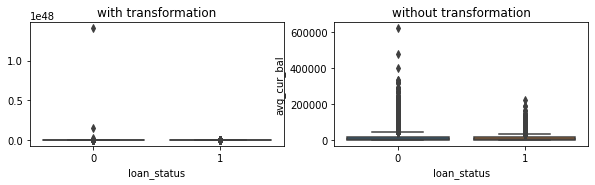

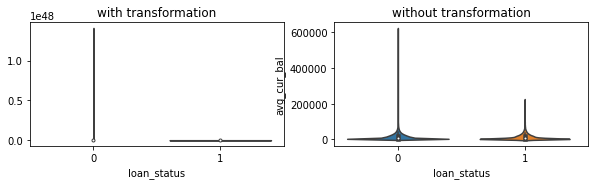


Correlation:
with transformation:
             loan_status  avg_cur_bal
loan_status     1.000000    -0.000766
avg_cur_bal    -0.000766     1.000000
without transformation:
             loan_status  avg_cur_bal
loan_status     1.000000    -0.027981
avg_cur_bal    -0.027981     1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=718750882.0, pvalue=1.442420359071345e-50)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=718750882.0, pvalue=1.442420359071345e-50)


In [46]:
analyze_bivariate_num_cat(df['avg_cur_bal'],'avg_cur_bal')

### Column/Attribute_15  : pct_tl_nvr_dlq

In [47]:
analyze_bivariate_num_null_mean('pct_tl_nvr_dlq')

Before null value imputation- null values : 1
After null value imputation-null values : 0


Before Transformation


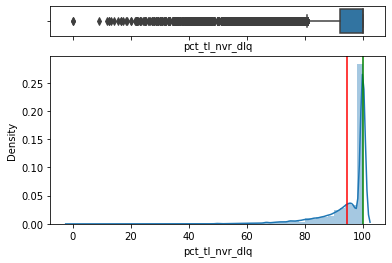

Before Transformation Skewness: -2.523451003712344

Checking for skewness with different transformation techniques
sqrt: -3.0560870346599116
cube root: -3.437199069382561
yeo-jhonson: -0.9236890791213334

After Transformation


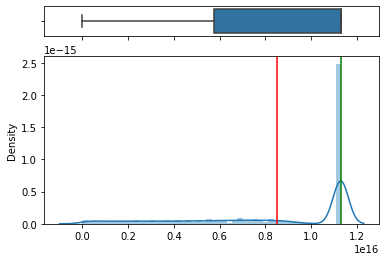

After Transformation Skewness: -0.9236890791213334
The lambda value is 8.472135811722177
Bivariate Analysis


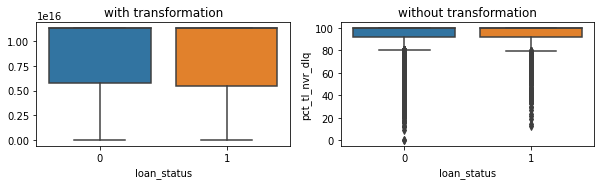

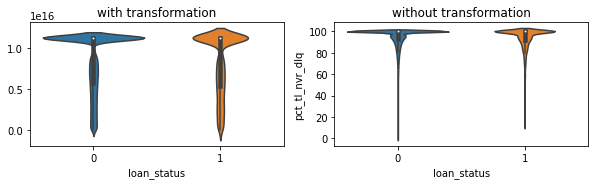


Correlation:
with transformation:
                loan_status  pct_tl_nvr_dlq
loan_status         1.00000        -0.01441
pct_tl_nvr_dlq     -0.01441         1.00000
without transformation:
                loan_status  pct_tl_nvr_dlq
loan_status        1.000000       -0.012545
pct_tl_nvr_dlq    -0.012545        1.000000

Statiscal Test:
Without Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=677796588.5, pvalue=7.377112318912246e-08)
With Transformation
KruskalResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=677796588.5, pvalue=7.377112318912246e-08)


In [48]:
analyze_bivariate_num_cat(df['pct_tl_nvr_dlq'],'pct_tl_nvr_dlq')

In [49]:
##########################################

In [50]:
#clarification required------ since we have 85 percentage as null values, how do we do the trasformation

### Column/Attribute_16  :  sec_app_mths_since_last_major_derog

In [51]:
analyze_bivariate_num_null('sec_app_mths_since_last_major_derog')

Before null value imputation- null values : 143202
After null value imputation-null values : 0


In [52]:
#analyze_bivariate_cat_cat('sec_app_mths_since_last_major_derog')

### Column/Attribute_17  : mths_since_last_record

In [53]:
analyze_bivariate_num_null('mths_since_last_record')

Before null value imputation- null values : 129970
After null value imputation-null values : 0


In [54]:
#analyze_bivariate_num_cat(df['mths_since_last_record'],'mths_since_last_record')

### Column/Attribute_18  :  verification_status_joint

In [55]:
analyze_bivariate_num_null('verification_status_joint')

Before null value imputation- null values : 128803
After null value imputation-null values : 0


In [56]:
#analyze_bivariate_num_cat(df['verification_status_joint'],'verification_status_joint')

### Column/Attribute_19  :  sec_app_revol_util

In [57]:
analyze_bivariate_num_null('sec_app_revol_util')

Before null value imputation- null values : 128777
After null value imputation-null values : 0


In [58]:
#analyze_bivariate_num_cat(df['sec_app_revol_util'],'sec_app_revol_util')

### Column/Attribute_20  : annual_inc_joint

In [59]:
analyze_bivariate_num_null('annual_inc_joint')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [60]:
# analyze_bivariate_num_cat(df['annual_inc_joint'],'annual_inc_joint')

### Column/Attribute_21  :  dti_joint

In [61]:
analyze_bivariate_num_null('dti_joint')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [62]:
#analyze_bivariate_num_cat(df['dti_joint'],'dti_joint')

### Column/Attribute_22  :  revol_bal_joint

In [63]:
analyze_bivariate_num_null('revol_bal_joint')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [64]:
#analyze_bivariate_num_cat(df['revol_bal_joint'],'revol_bal_joint')

### Column/Attribute_23  :  sec_app_earliest_cr_line

In [65]:
analyze_bivariate_num_null('sec_app_earliest_cr_line')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [66]:
#analyze_bivariate_num_cat(df['sec_app_earliest_cr_line'],'sec_app_earliest_cr_line')

### Column/Attribute_24  :  sec_app_inq_last_6mths

In [67]:
analyze_bivariate_num_null('sec_app_inq_last_6mths')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [68]:
#analyze_bivariate_num_cat(df['sec_app_inq_last_6mths'],'sec_app_inq_last_6mths')

### Column/Attribute_25  :  sec_app_mort_acc

In [69]:
analyze_bivariate_num_null('sec_app_mort_acc')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [70]:
#analyze_bivariate_num_cat(df['sec_app_mort_acc'],'sec_app_mort_acc')

### Column/Attribute_26  :  sec_app_open_acc

In [71]:
analyze_bivariate_num_null('sec_app_open_acc')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [72]:
#analyze_bivariate_num_cat(df['sec_app_open_acc'],'sec_app_open_acc')

### Column/Attribute_27  :  sec_app_open_act_il

In [73]:
analyze_bivariate_num_null('sec_app_open_act_il')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [74]:
#analyze_bivariate_num_cat(df['sec_app_open_act_il'],'sec_app_open_act_il')

### Column/Attribute_28  :  sec_app_num_rev_accts

In [75]:
analyze_bivariate_num_null('sec_app_num_rev_accts')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [76]:
#analyze_bivariate_num_cat(df['sec_app_num_rev_accts'],'sec_app_num_rev_accts')

### Column/Attribute_29  :  sec_app_chargeoff_within_12_mths


In [77]:
analyze_bivariate_num_null('sec_app_chargeoff_within_12_mths')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [78]:
#analyze_bivariate_num_cat(df['sec_app_chargeoff_within_12_mths'],'sec_app_chargeoff_within_12_mths')

### Column/Attribute_30  :  sec_app_collections_12_mths_ex_med

In [79]:
analyze_bivariate_num_null('sec_app_collections_12_mths_ex_med')

Before null value imputation- null values : 128353
After null value imputation-null values : 0


In [80]:
#analyze_bivariate_num_cat(df['sec_app_collections_12_mths_ex_med'],'sec_app_collections_12_mths_ex_med')

In [81]:
## missing values treatment

In [82]:
# ALL THE BELOW DATA HAS 85% DATA MISSING AND THIS TIES INTO THE RATIO OF APPLICATION TYPE COLUMN
# 85% BORROWERS ARE NON-JOINT LOAN APPLIERS AND ONLY 14% OF THEM ARE JOINT LOAN APPLICANTS
# so all the below missing data should be imputed with 0s. since the data is not available and it wouldn't highly inaccurate to use imputation methods like mean/median/mode or K-NN

# 16	sec_app_mths_since_last_major_derog	94.96657648
# 18	verification_status_joint	85.41766141
# 19	sec_app_revol_util	85.40041912
# 20	annual_inc_joint	85.11923709
# 21	dti_joint	85.11923709
# 22	revol_bal_joint	85.11923709
# 23	sec_app_earliest_cr_line	85.11923709
# 24	sec_app_inq_last_6mths	85.11923709
# 25	sec_app_mort_acc	85.11923709
# 26	sec_app_open_acc	85.11923709
# 27	sec_app_open_act_il	85.11923709
# 28	sec_app_num_rtev_accts	85.11923709
# 29	sec_app_chargeoff_within_12_mths	85.11923709
# 30	sec_app_collections_12_mths_ex_med	85.11923709

In [83]:
#taking into consideration the no null value column of delinq_2yrs which indicates the number of months past due dates that in the borrower's credit file
#where 85% of the borrowers have no delinquency history at all two years past the date of application
#so it is highly possible that these set of borrowers would have little to no delinquencies before those 2 years
#can also look at delinq amnt which indicates 99.9% have no delinquency amount left to pay (fully paid)

# 1	mths_since_recent_revol_delinq	71.31081224 
# - the missing values would probably be zero because maybe these set of people didn't have any revolving account delinquency, using mean, median or mode would be erroneous
#- revolving account is an open credit line and doesn't consider overall account balance or even overall credit account balance

# 2	mths_since_last_delinq	56.10642474  
# - missing data can't be derived from other columns. 
# - it's hard to assess if the values are missing because the person never had a delinquency or if it's because the person simply did not record it
# - using mean imputation might be accurate since the outliers in this data are quite big and K-NN imputation is sensitive to that. and we're using mean and not median because mean and median are too close to each other

# 3	il_util	16.61626611
# - data is heavily skewed,the mean and median are not too far off from each other (67 and 70)
# can do mean imputation

# 4	mths_since_recent_inq	12.42174651
# - mean and median are just one unit of each other (6 and 7) and the data is not heavily skewed
# so we can use k-nn imputation since the outliers are not very huge


# 5	mths_since_rcnt_il	3.9033901
# - 4% data would usually compel to delete rows but that would mean deleting 6000 records of the target variable in our dataset
# - the mean and median are not close to each other and the data is heavily skewed
# - it would be advisable to use k-NN imputation or median imputation

# 6	mo_sin_old_il_acct	3.9033901
# - mean and median are not close to each other and the data is skewed
# - can use kNN imputation or median imputation


# 7	bc_util	1.427131413
# - the mean and median are close to each other and different only by a unit
# - can impute missing values with mean

# 8	percent_bc_gt_75	1.387341504
# - the mean and median are not close to each other
# - the data is not heavily skewed
# - k-NN imputation would be good to use

# 9	bc_open_to_buy	1.384025678
# - mean and median are not even close to each other and the data is heavily skewed
# - can use k-NN imputation since even spread of the outliers (even the really high values)

# 10	mths_since_recent_bc	1.300466868
# - the mean and median are not close to each other, data is heavily skewed
# - since very little percent of the values are missing they can imputed with the median or using the K-NN imputer (but if the outliers are huge they impact K-NN imputation a LOT)

# 11	dti	0.240728951
# - dti depends on debt and income, the pattern is the more income the person makes the less his dti
# - the less debt a person has the lower his dti
# - dti missing values imputation can be filled by categorising dti values to annual income levels (can be done later)
# - for now mean and median are close of the data, it's heavily skewed and the spread of outliers is pretty even
# - and the number of missing values is very less so we can impute using mean or k-NN imputation

# 12	revol_util	0.135285692
# - the mean and median are not far off from each other. (43.34 and 41.5), the data is not heavily skewed
# - so we can use mean to impute 

# 13	all_util	0.026526606
# the mean and median are not too far from each other and the data is slightly negatively skewed
# we can use mean imputation

# 14	avg_cur_bal	0.007294817
# - mean and median are not close to each other, and the data is heavily skewed
# -k-NN imputation would be good

# 15	pct_tl_nvr_dlq	0.000663165
# heavily negatively skewed, mean and median are not close to each other
# only one value is missing. we can impute it with the mean/median or mode of data
#or we can just remove this record. since it's just one value. we won't be losing a lot of target variable data

# 17	mths_since_last_record	86.19157515
# bankruptcy, judgment, or a tax lien are the public records available on a person's credit report
# so the reason so much data is missing is probably because the person does not have a public record on their credit report
#the number of missing values in this column is equal to the number of records with 0s for their pub_rec (number of public records) column
#thus confirming my assumption
# so fill missing values with 0s

In [84]:
dft.to_excel('cleaned_data_1.xlsx')